In [11]:
library('TSSS')
library('TTR')
library('tseries')
library('forecast')

In [12]:
data <- read.csv('iip.csv')
milk <- data[['milk']]


 Fitting models using approximations to speed things up...

 ARIMA(2,0,0) with non-zero mean : 1829.525
 ARIMA(0,0,0) with non-zero mean : 2062.746
 ARIMA(1,0,0) with non-zero mean : 1844.998
 ARIMA(0,0,0) with zero mean     : 3751.96
 ARIMA(3,0,0) with non-zero mean : 1821.097
 ARIMA(4,0,0) with non-zero mean : 1803.398
 ARIMA(5,0,0) with non-zero mean : 1792.892
 ARIMA(5,0,0) with zero mean     : Inf

 Now re-fitting the best model(s) without approximations...

 ARIMA(5,0,0) with non-zero mean : 1802.663

 Best model: ARIMA(5,0,0) with non-zero mean 



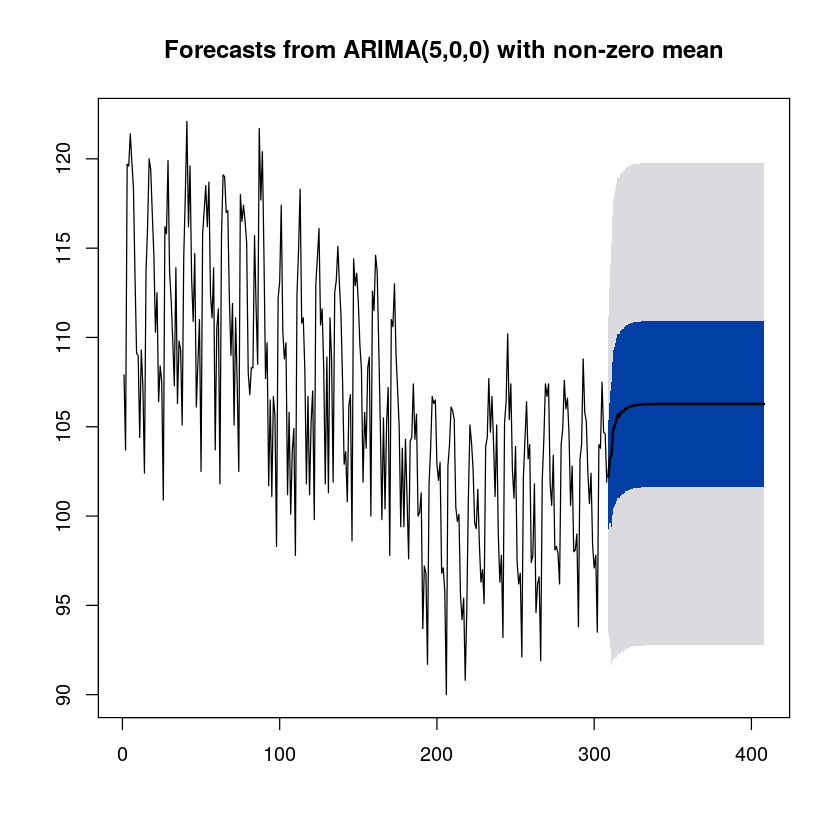


	Ljung-Box test

data:  Residuals from ARIMA(5,0,0) with non-zero mean
Q* = 11.205, df = 4, p-value = 0.02436

Model df: 6.   Total lags used: 10



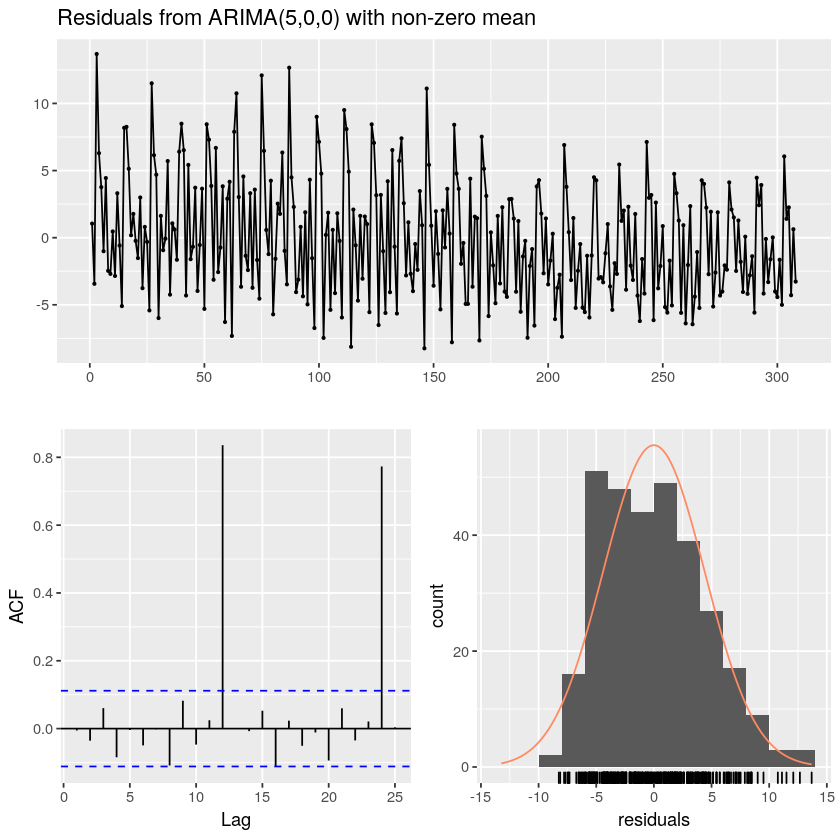

In [68]:
model_ar <- auto.arima(
    milk, ic = "aic", max.d=0, max.q = 0,
    trace = T, stepwise = T, seasonal = F)
plot(forecast(model_ar, level = c(50,95),h = 100))
checkresiduals(model_ar)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : 1819.708
 ARIMA(0,1,0) with drift         : 1880.711
 ARIMA(1,1,0) with drift         : 1843.977
 ARIMA(0,1,1) with drift         : 1846.933
 ARIMA(0,1,0)                    : 1878.716
 ARIMA(1,1,2) with drift         : 1846.255
 ARIMA(2,1,1) with drift         : 1828.791
 ARIMA(3,1,2) with drift         : 1824.138
 ARIMA(2,1,3) with drift         : 1792.057
 ARIMA(1,1,3) with drift         : 1801.567
 ARIMA(3,1,3) with drift         : 1765.686
 ARIMA(4,1,3) with drift         : 1686.124
 ARIMA(4,1,2) with drift         : 1739.403
 ARIMA(5,1,3) with drift         : 1693.155
 ARIMA(4,1,4) with drift         : 1688.093
 ARIMA(3,1,4) with drift         : 1743.001
 ARIMA(5,1,2) with drift         : 1727.898
 ARIMA(5,1,4) with drift         : Inf
 ARIMA(4,1,3)                    : 1684.475
 ARIMA(3,1,3)                    : 1767.26
 ARIMA(4,1,2)                    : 1741.685
 ARIMA(5,1,3)        

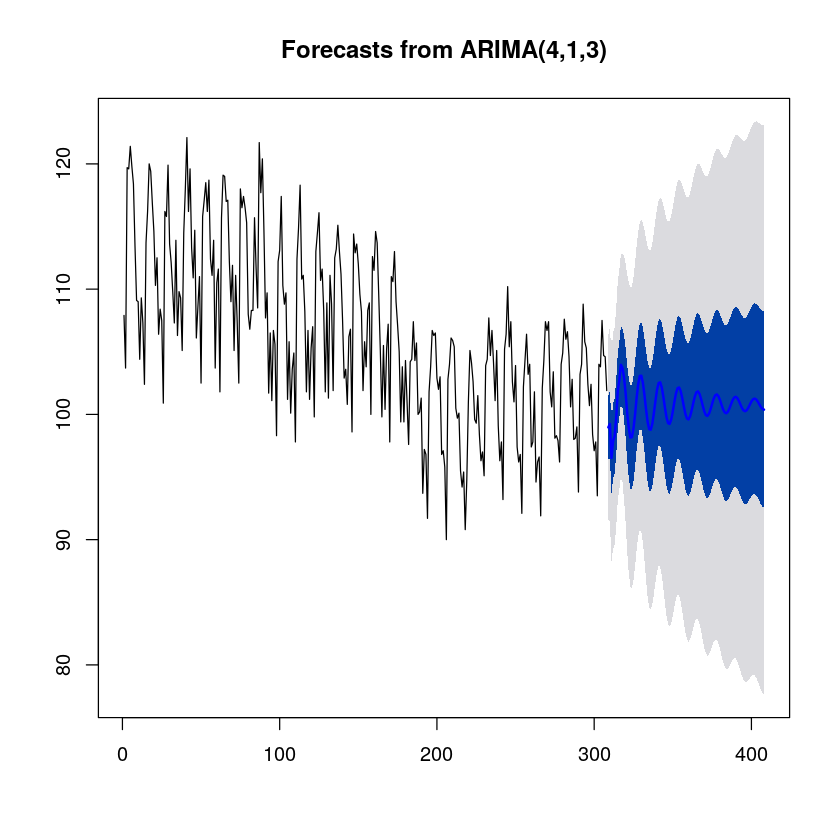


	Ljung-Box test

data:  Residuals from ARIMA(4,1,3)
Q* = 73.41, df = 3, p-value = 7.772e-16

Model df: 7.   Total lags used: 10



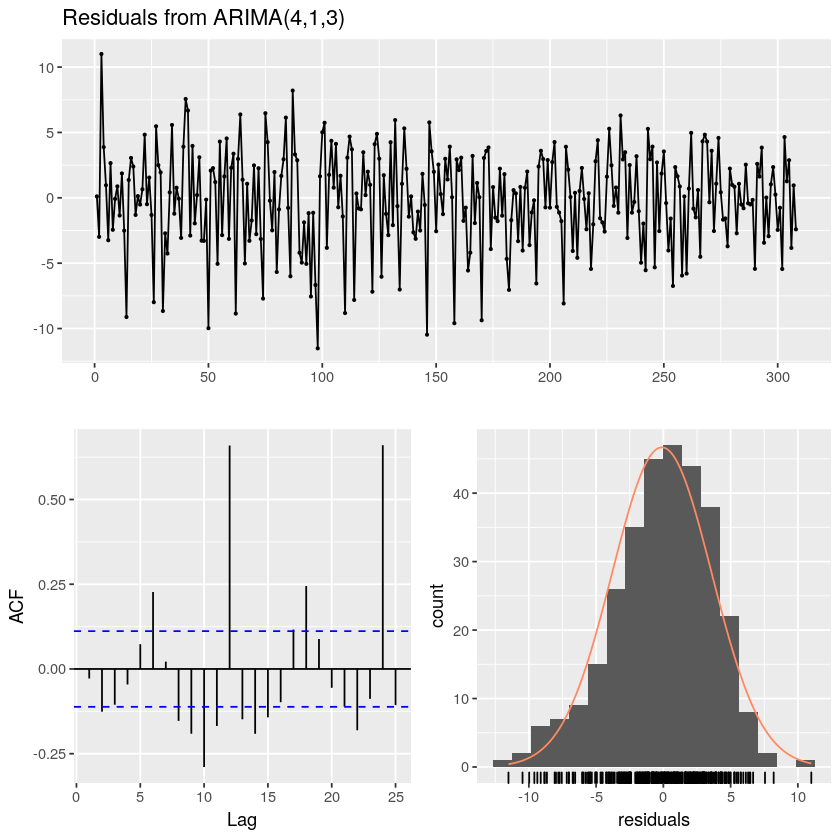

In [71]:
model_arima <- auto.arima(
    milk, ic = "aic",
    trace = T, stepwise = T, seasonal = F)
plot(forecast(model_arima, level = c(50,95), h = 100))
checkresiduals(model_arima)


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2)(1,0,1)[12] with non-zero mean : 1251.64
 ARIMA(0,0,0)            with non-zero mean : 1440.075
 ARIMA(1,0,0)(1,0,0)[12] with non-zero mean : 1301.526
 ARIMA(0,0,1)(0,0,1)[12] with non-zero mean : 1334.216
 ARIMA(0,0,0)            with zero mean     : 1446.699
 ARIMA(2,0,2)(0,0,1)[12] with non-zero mean : 1252.834
 ARIMA(2,0,2)(1,0,0)[12] with non-zero mean : 1278.344
 ARIMA(2,0,2)(2,0,1)[12] with non-zero mean : 1250.66
 ARIMA(2,0,2)(2,0,0)[12] with non-zero mean : 1261.406
 ARIMA(2,0,2)(2,0,2)[12] with non-zero mean : 1237.992
 ARIMA(2,0,2)(1,0,2)[12] with non-zero mean : 1244.112
 ARIMA(1,0,2)(2,0,2)[12] with non-zero mean : 1235.494
 ARIMA(1,0,2)(1,0,2)[12] with non-zero mean : 1240.35
 ARIMA(1,0,2)(2,0,1)[12] with non-zero mean : 1247.225
 ARIMA(1,0,2)(1,0,1)[12] with non-zero mean : 1246.304
 ARIMA(0,0,2)(2,0,2)[12] with non-zero mean : 1295.78
 ARIMA(1,0,1)(2,0,2)[12] with non-zero mean : 1235.177
 ARIMA(1

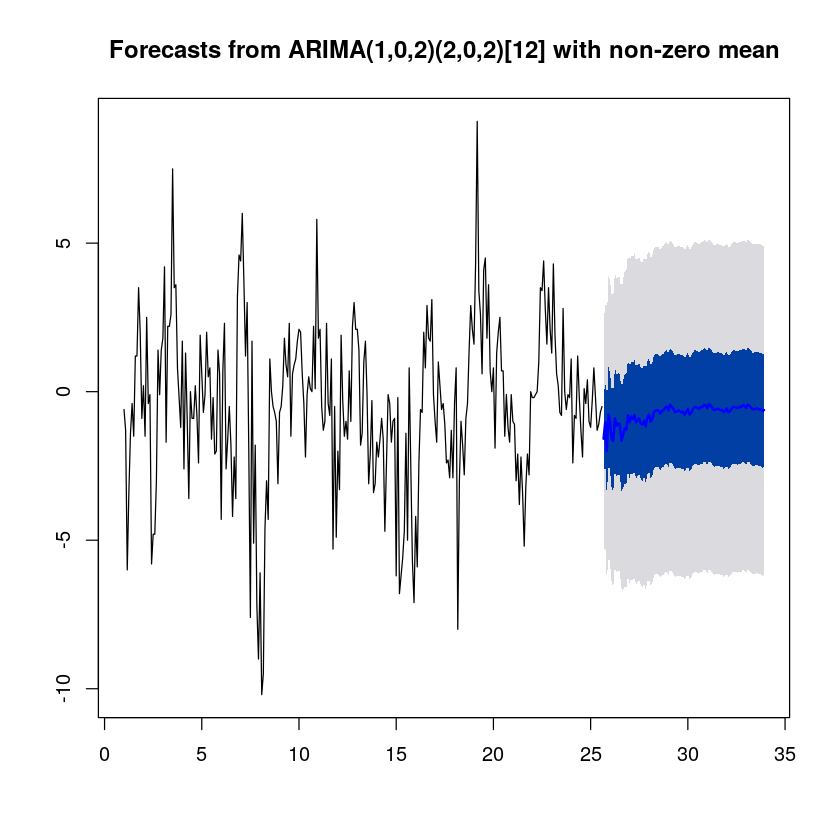


	Ljung-Box test

data:  Residuals from ARIMA(1,0,2)(2,0,2)[12] with non-zero mean
Q* = 50.64, df = 16, p-value = 1.812e-05

Model df: 8.   Total lags used: 24



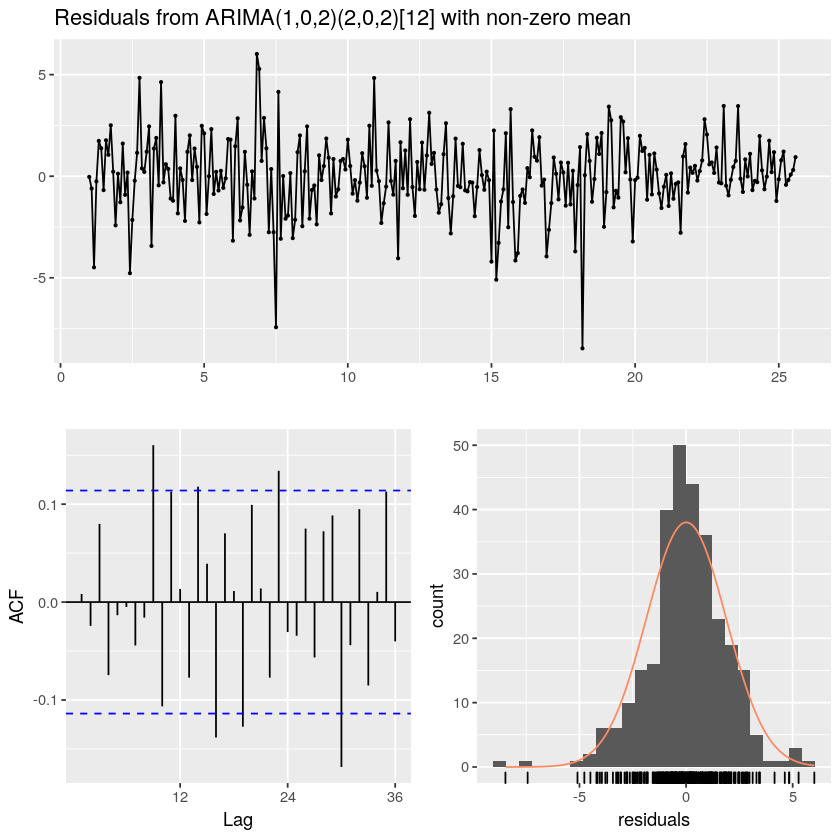

In [69]:
milk_ts = ts(as.numeric(milk), frequency = 12)
model_sarima <- auto.arima(
    milk_ts, ic = "aic",
    trace = T, stepwise = T, seasonal = T)
plot(forecast(model_sarima, level = c(50,95), h = 100))
checkresiduals(model_sarima)

In [62]:
AIC(model_ar)
AIC(model_arima)
AIC(model_sarima)

[1] 1802.663

[1] 1695.92

[1] 1239.528

---

In [1]:
library('TSSS')
library('TTR')
library('tseries')
#library('stats')

In [2]:
data <- read.csv('iip.csv')
#data_xts = as.xts(
#    read.zoo('iip.csv', header=TRUE, sep=','))
milk <- data[['milk']]
meat <- data[['meat']]
alcohol <- data[['alcohol']]

In [3]:
pp.test(milk)
pp.test(meat)
pp.test(alcohol)

Warning message in pp.test(milk):
“p-value smaller than printed p-value”


	Phillips-Perron Unit Root Test

data:  milk
Dickey-Fuller Z(alpha) = -154.22, Truncation lag parameter = 5, p-value
= 0.01
alternative hypothesis: stationary


Warning message in pp.test(meat):
“p-value smaller than printed p-value”


	Phillips-Perron Unit Root Test

data:  meat
Dickey-Fuller Z(alpha) = -227.43, Truncation lag parameter = 5, p-value
= 0.01
alternative hypothesis: stationary


Warning message in pp.test(alcohol):
“p-value smaller than printed p-value”


	Phillips-Perron Unit Root Test

data:  alcohol
Dickey-Fuller Z(alpha) = -261.21, Truncation lag parameter = 5, p-value
= 0.01
alternative hypothesis: stationary


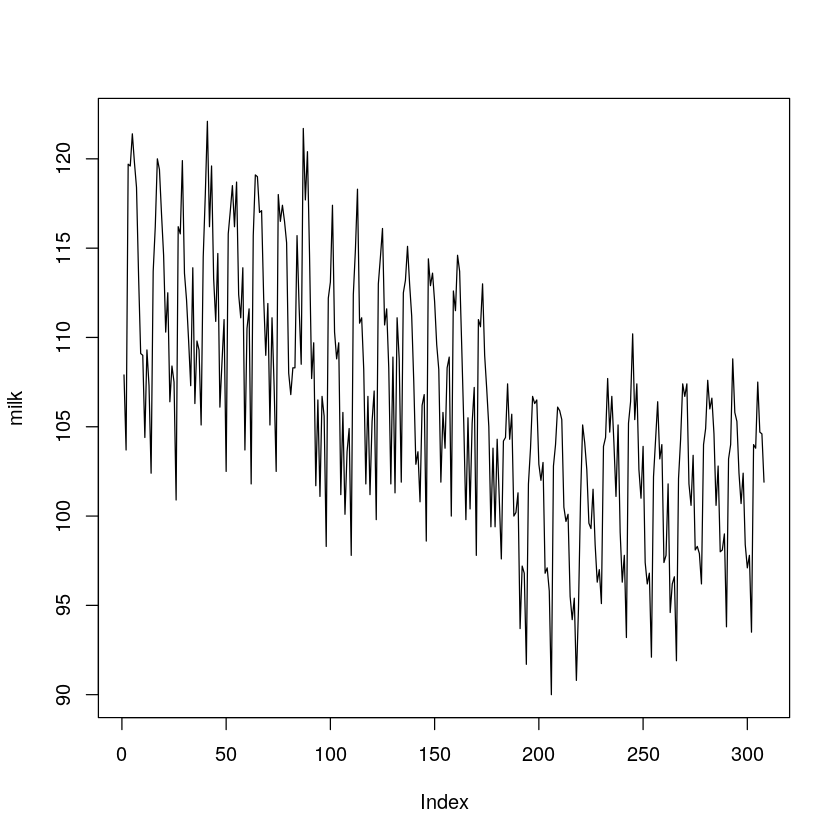

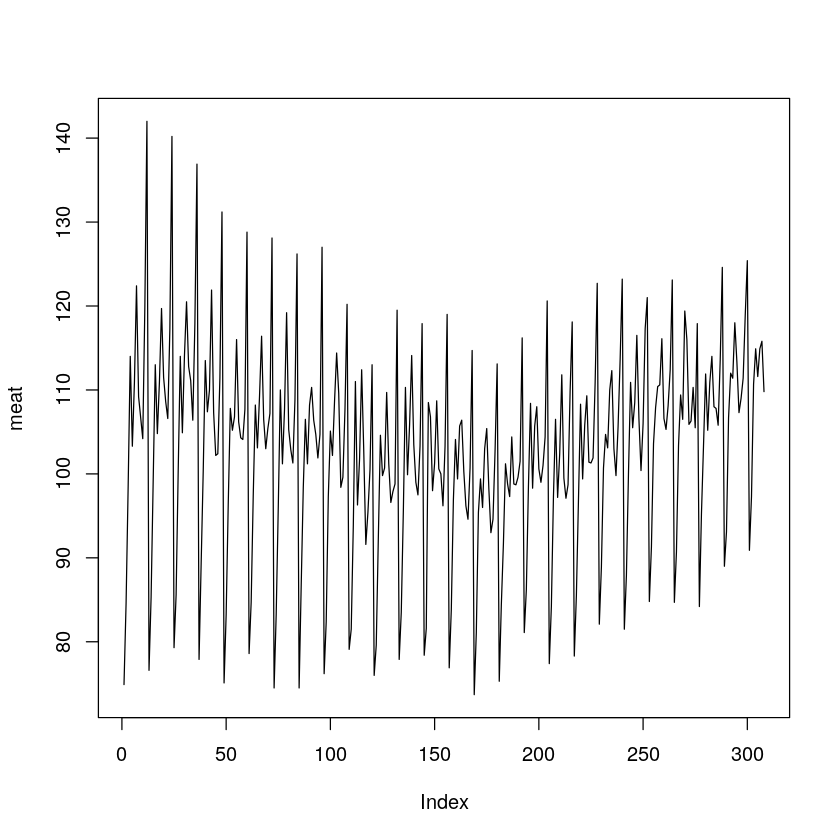

ERROR: Error in replayPlot(obj): invalid graphics state


plot without title

In [82]:
plot(milk, type = 'l')
plot(meat, type = 'l')
plot(alcohol, type = 'l')

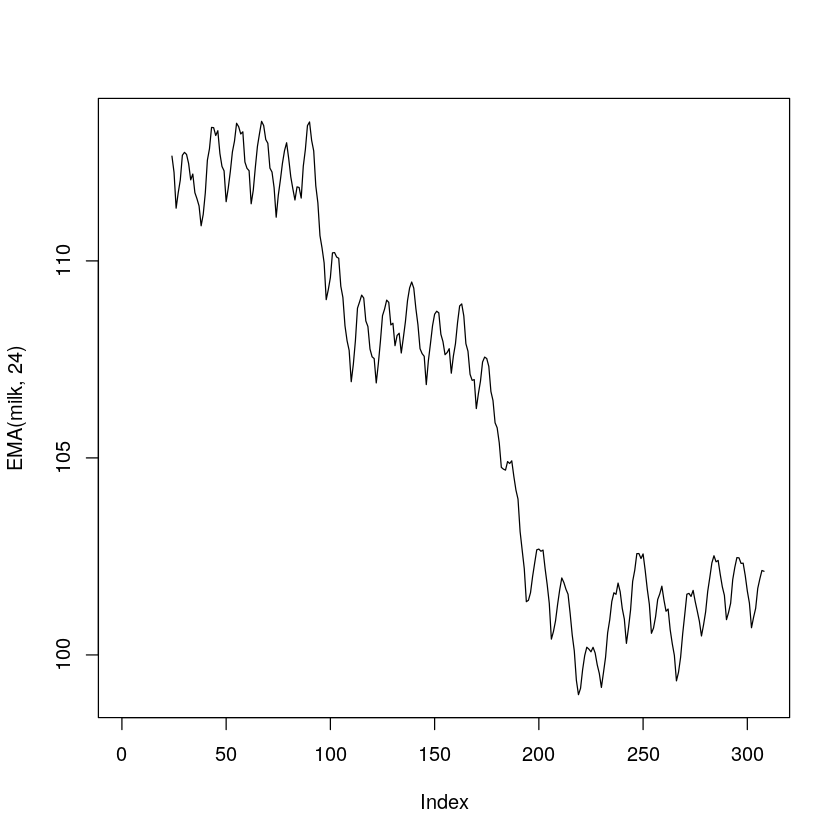

In [5]:
plot(EMA(milk, 24), type = 'l')

<<< new data ( n = 13 --- 36 ) >>>
 initial model : NS =    24
		ms = 12   sds =  3.221851e+00   aics =      122.188

<<< new data ( n = 37 --- 60 ) >>>
 switched model : ( nf = 24, ns = 24 )
	 ms = 12   sds =  3.547822e+00   aics =      246.689
 pooled model : ( np = 48 )
	 mp = 12   sdp =  4.971155e+00   aicp =      239.193

 ***  pooled model accepted   ***

<<< new data ( n = 61 --- 84 ) >>>
 switched model : ( nf = 48, ns = 24 )
	 ms = 12   sds =  2.230384e+00   aics =      352.555
 pooled model : ( np = 72 )
	 mp = 12   sdp =  5.269901e+00   aicp =      349.992

 ***  pooled model accepted   ***

<<< new data ( n = 85 --- 108 ) >>>
 switched model : ( nf = 72, ns = 24 )
	 ms = 12   sds =  8.596587e+00   aics =      495.734
 pooled model : ( np = 96 )
	 mp = 12   sdp =  7.874107e+00   aicp =      496.540

 ***  switched model accepted   ***

<<< new data ( n = 109 --- 132 ) >>>
 switched model : ( nf = 24, ns = 24 )
	 ms = 12   sds =  1.190416e+00   aics =      244.034
 pooled mod

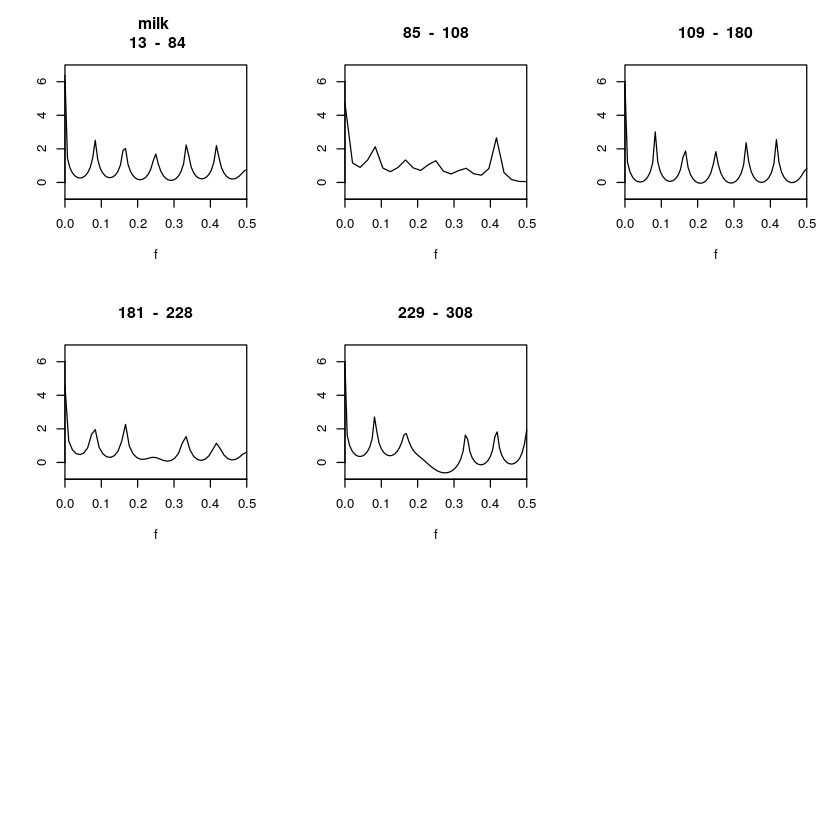

In [6]:
lsar(milk, max.arorder = 12, ns0 = 24)

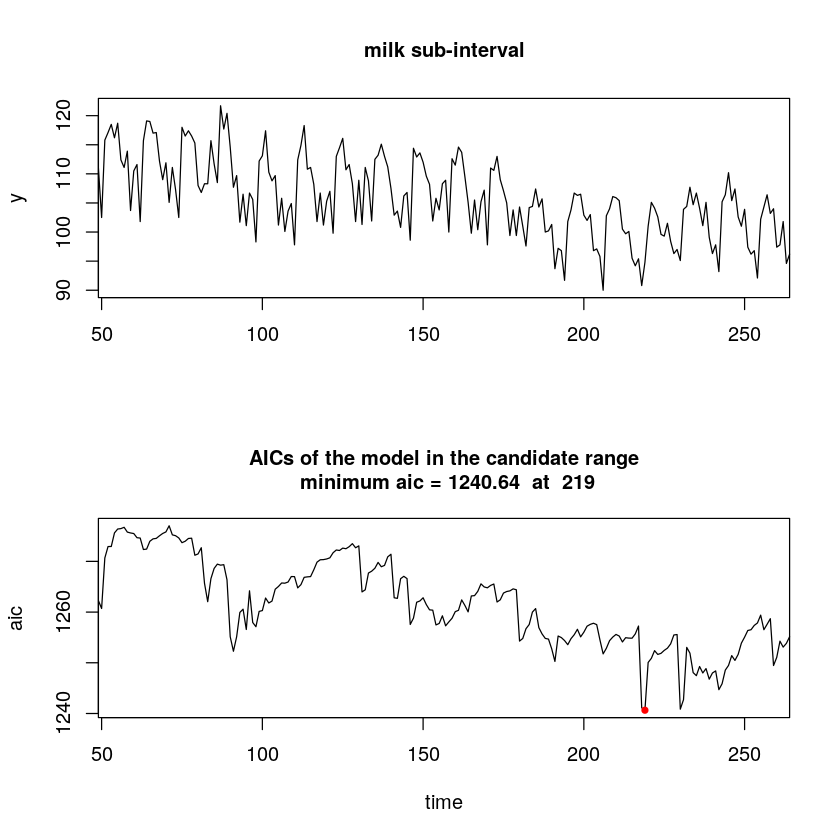

In [7]:
lsar.chgpt(milk, subinterval = c(0, 308), candidate = c(48, 264))


 tau2		 8.85019e-01	 1.10058e-08
 sigma2		 1.68187e+00
 log-likelihood	    -728.043
 aic		    1484.087



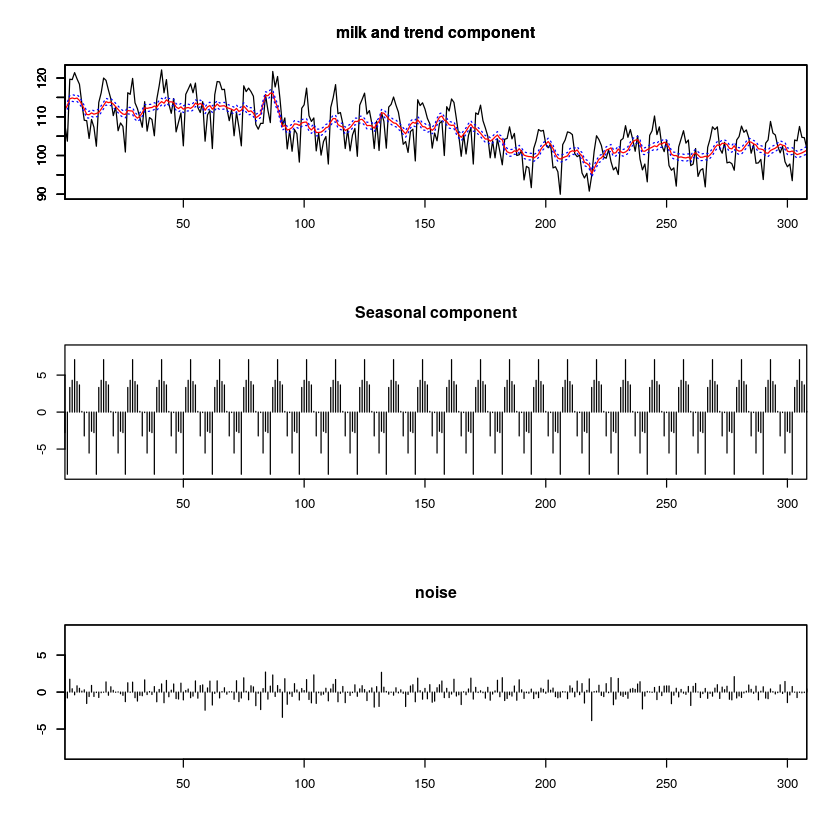

In [8]:
season(milk)

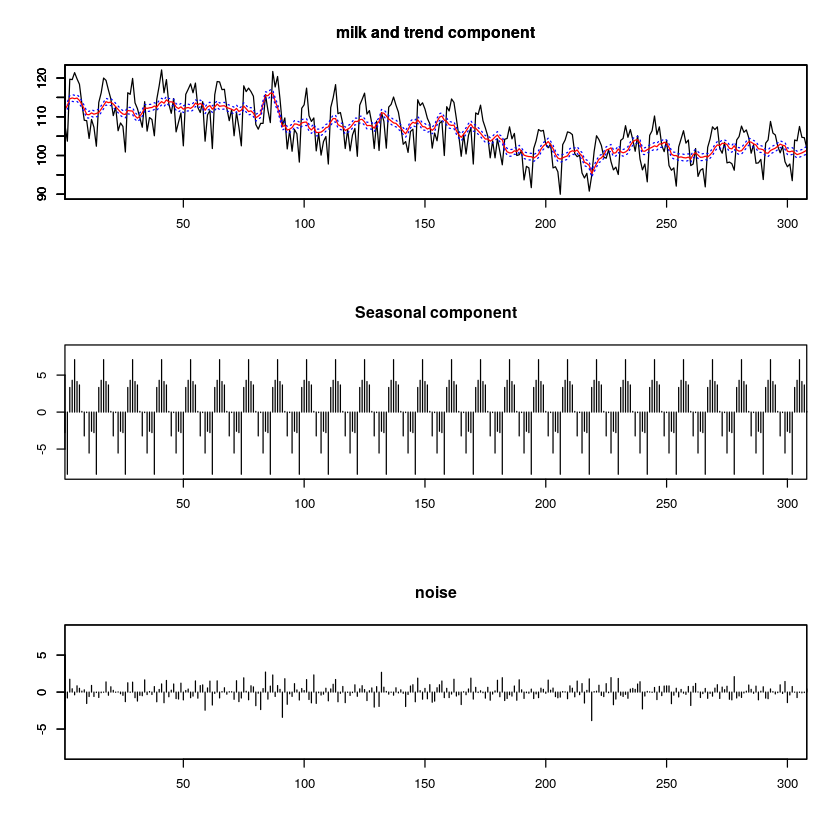

In [9]:
trend_milk = season(milk)$trend

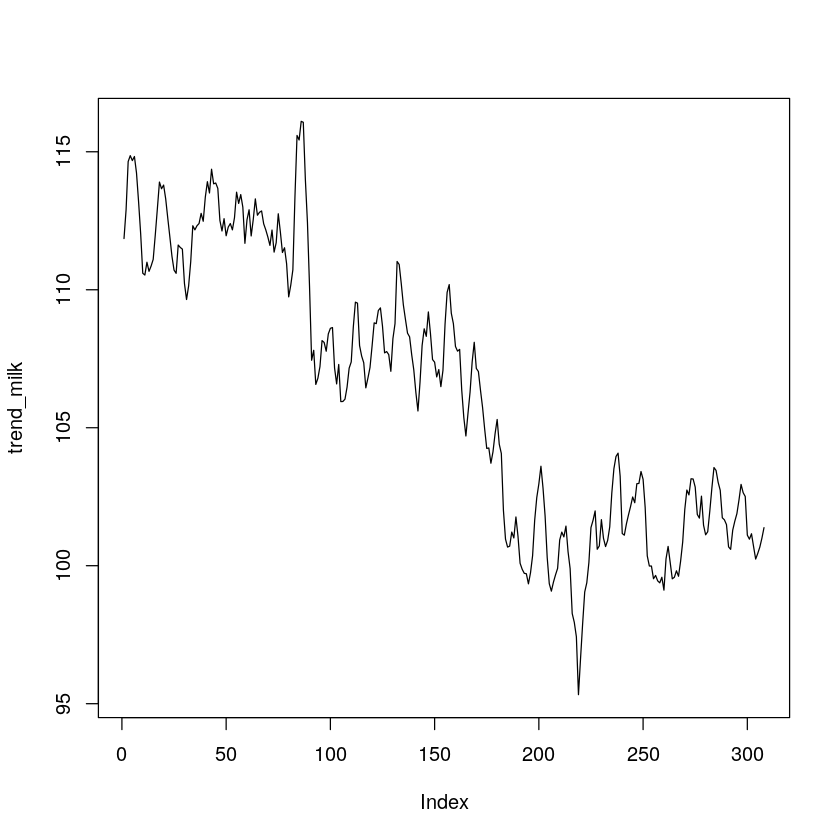

In [10]:
plot(trend_milk, type = 'l')